In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

In [9]:
telco_base_data = pd.read_csv("./dataset/Churn_Modelling.csv")
telco_base_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Univariate Analysis

In [12]:
telco_new = pd.DataFrame(data=telco_base_data[['Geography','Gender','Exited']])
telco_new.head(5)

,Geography,Gender,Exited
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


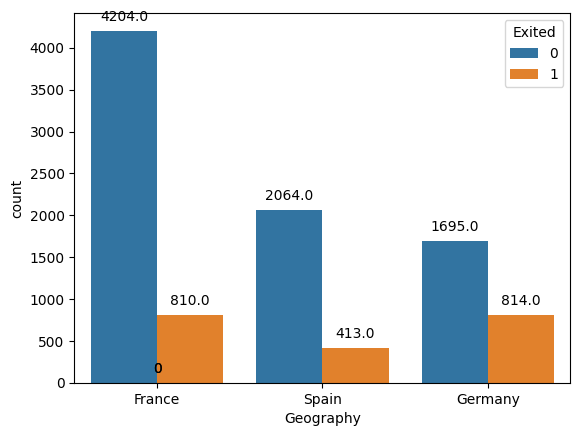

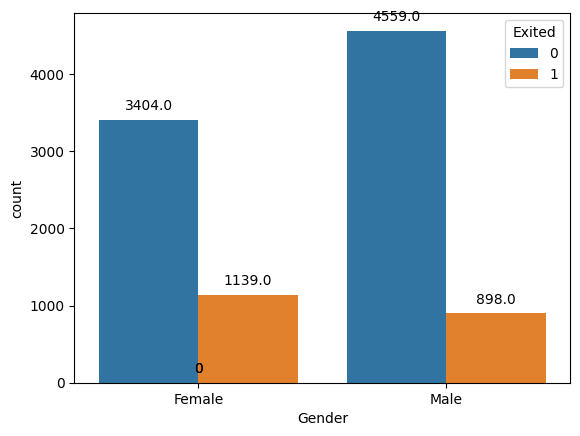

In [27]:
# Loop melalui setiap kolom kecuali 'Exited'
for i in telco_new.drop(columns='Exited'):
    # Buat countplot
    plt.figure()
    ax = sns.countplot(data=telco_new, x=i, hue='Exited')

    # Tambahkan label nilai pada setiap bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() ),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Tampilkan plot
plt.show()

pada geography german terdapat jumlah perbandingan pelanggan yang keluar dan tidak terbanyak dan kemudian dari segi gender perempuan lebih banyak yang keluar daripada laki laki. Jika pada univariate tidak didapatkan informasi maka bukan berarti fitur tersebut tidak penting, bisa saja ketika dilakukan analisis lebih lanjut maka fitur tersebut dapat memberikan informasi yang berarti.

## Bivariate Analysis

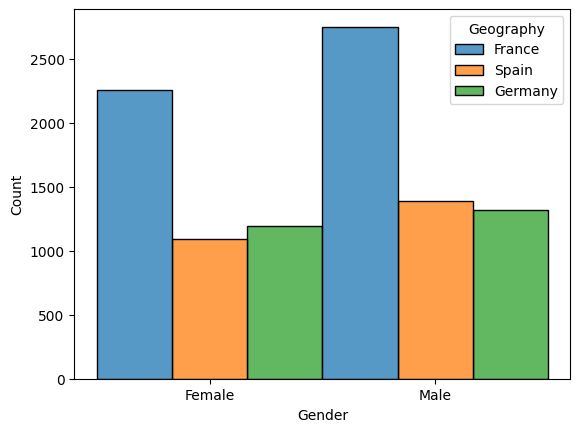

In [48]:
sns.histplot(x='Gender',hue='Geography',data=telco_new,stat='count',multiple='dodge')
plt.show()

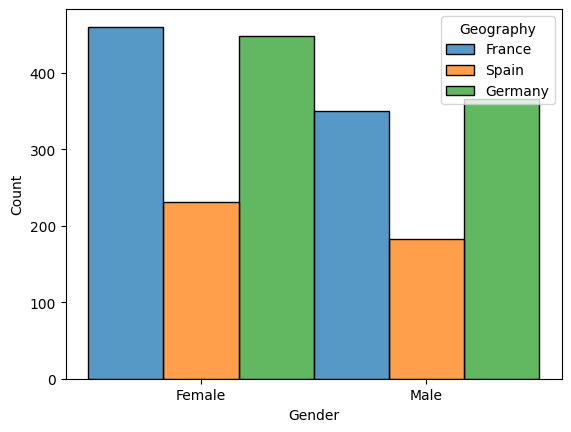

In [50]:
sns.histplot(x='Gender',hue='Geography',data=telco_new.loc[telco_new['Exited'] == 1],stat='count',multiple='dodge')
plt.show()

Female yang berada di france memiliki jumlah tertinggi ganti provider

## NUMERICAL ANALYSIS

Correlation: 
- +1 : Korelasi Positif
- -1 : Korelasi Negatif
-  0  : Tidak ada Korelasi

In [57]:
telco_base_data.select_dtypes(exclude='object').corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

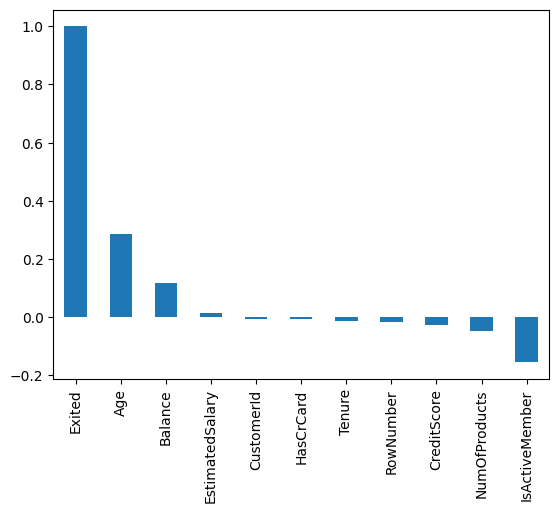

In [60]:
telco_base_data.select_dtypes(exclude='object').corr()['Exited'].sort_values(ascending=False).plot(kind='bar')

Age dan Balance memiliki nilai korelasi tertinggi terhadap independent variabel exited

<Axes: >

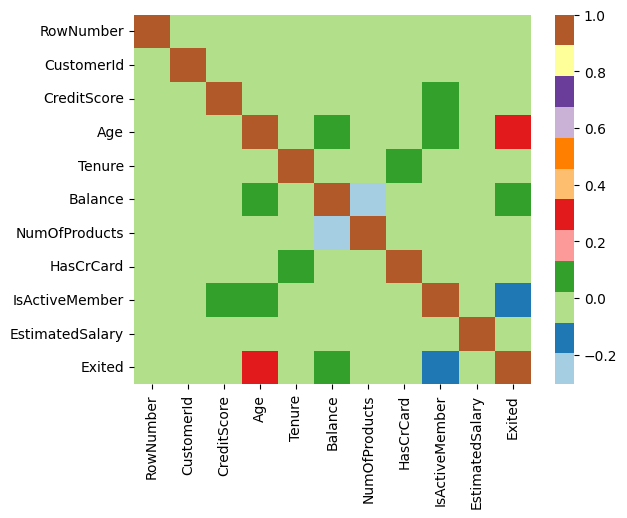

In [64]:
sns.heatmap(telco_base_data.select_dtypes(exclude='object').corr(),cmap='Paired')

<Axes: xlabel='Age'>

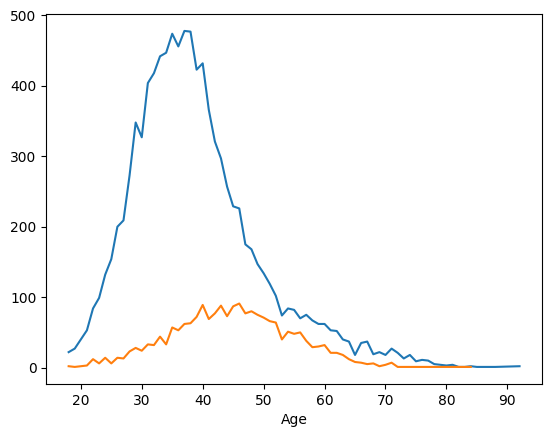

In [72]:
telco_base_data['Age'].value_counts().sort_index(ascending=True).plot(kind='line')
telco_base_data['Age'].loc[telco_base_data['Exited'] == 1].value_counts().sort_index(ascending=True).plot(kind='line')

Umur antara 40 - 50 merupakan umur tertinggi yang pindah provider

C:\Users\Asus\AppData\Local\Temp\ipykernel_21444\3589968885.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==0)],
C:\Users\Asus\AppData\Local\Temp\ipykernel_21444\3589968885.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==1)],


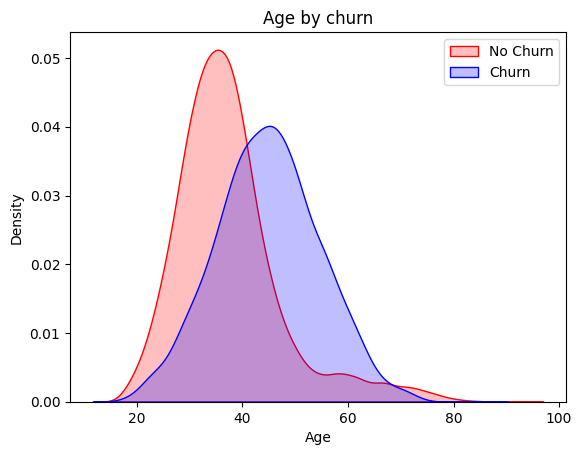

In [74]:
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(telco_base_data.Age[(telco_base_data["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Age')
Tot.set_title('Age by churn')
plt.show()

Grafik tersebut menunjukkan bahwa usia rata-rata pelanggan yang churn adalah lebih tinggi daripada usia rata-rata pelanggan yang tidak churn. Pada usia 20 tahun, distribusi usia pelanggan yang churn dan tidak churn relatif sama. Namun, pada usia 40 tahun, distribusi usia pelanggan yang churn mulai meningkat. Pada usia 60 tahun, distribusi usia pelanggan yang churn jauh lebih tinggi daripada usia pelanggan yang tidak churn.

Insight yang dapat diperoleh dari analisis grafik tersebut adalah sebagai berikut:

Pelanggan yang lebih tua lebih cenderung churn daripada pelanggan yang lebih muda.
Faktor usia dapat menjadi faktor yang berpengaruh terhadap churn.

C:\Users\Asus\AppData\Local\Temp\ipykernel_21444\3581521652.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==0)],
C:\Users\Asus\AppData\Local\Temp\ipykernel_21444\3581521652.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==1)],


Text(0.5, 1.0, 'Tenure by churn')

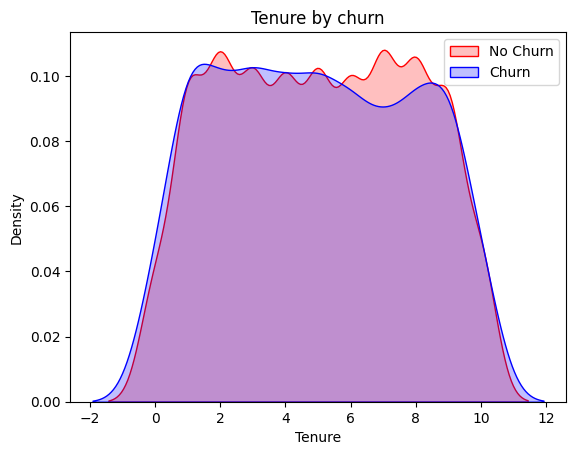

In [75]:
Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(telco_base_data.Tenure[(telco_base_data["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Tenure')
Tot.set_title('Tenure by churn')

Grafik tersebut menunjukkan bahwa masa kerja rata-rata pelanggan yang churn adalah lebih pendek daripada masa kerja rata-rata pelanggan yang tidak churn. Pada masa kerja 0-2 tahun, distribusi masa kerja pelanggan yang churn dan tidak churn relatif sama. Namun, pada masa kerja 4-6 tahun, distribusi masa kerja pelanggan yang churn mulai meningkat. Pada masa kerja 8-10 tahun, distribusi masa kerja pelanggan yang churn jauh lebih tinggi daripada masa kerja pelanggan yang tidak churn.

Insight yang dapat diperoleh dari analisis grafik tersebut adalah sebagai berikut:

Pelanggan dengan masa kerja yang lebih pendek lebih cenderung churn daripada pelanggan dengan masa kerja yang lebih lama.
Namun tidak terdapat perbedaan signifikan antara kedua grafik tersebut sehingga fitur ini kurang berpengaruh.

C:\Users\Asus\AppData\Local\Temp\ipykernel_21444\174169442.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==0)],
C:\Users\Asus\AppData\Local\Temp\ipykernel_21444\174169442.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==1)],


Text(0.5, 1.0, 'Balance by churn')

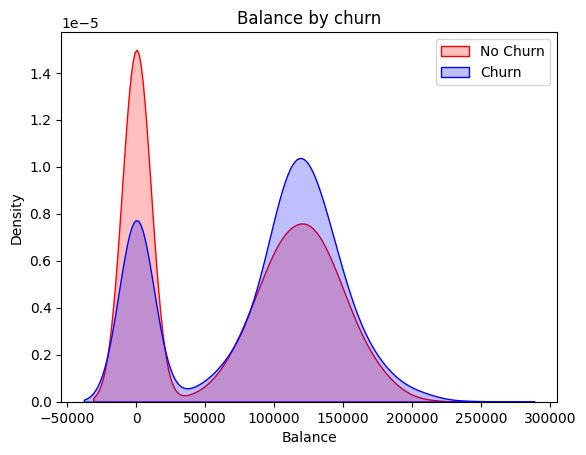

In [76]:

Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==0)],
                  color="Red", shade=True)
Tot = sns.kdeplot(telco_base_data.Balance[(telco_base_data["Exited"]==1)],
                  color="Blue", shade=True)
Tot.legend(["No Churn", "Churn"], loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Balance')
Tot.set_title('Balance by churn')


Grafik tersebut menunjukkan bahwa saldo rata-rata pelanggan yang churn adalah lebih rendah daripada saldo rata-rata pelanggan yang tidak churn. Pada saldo 0-50.000, distribusi saldo pelanggan yang churn dan tidak churn relatif sama. Namun, pada saldo 50.000-100.000, distribusi saldo pelanggan yang churn mulai meningkat. Pada saldo 100.000-150.000, distribusi saldo pelanggan yang churn jauh lebih tinggi daripada saldo pelanggan yang tidak churn.

Insight yang dapat diperoleh dari analisis grafik tersebut adalah sebagai berikut:

Pelanggan dengan saldo yang lebih rendah lebih cenderung churn daripada pelanggan dengan saldo yang lebih tinggi.
Faktor saldo dapat menjadi faktor yang berpengaruh terhadap churn